In [4]:
! pip install catboost

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patheffects as path_effects

In [6]:
df=pd.read_json('/content/train_data.json')

FileNotFoundError: File /content/train_data.json does not exist

In [ ]:
df

,hash,targetAudience,points,value
0,41567f28db47bee7,"{'name': 'All 25-45 BC', 'gender': 'all', 'age...","[{'lat': '55.573691', 'lon': '37.631423', 'azi...",23.51
1,94b6df335598a161,"{'name': 'W 30-60', 'gender': 'female', 'ageFr...","[{'lat': '55.656665886902', 'lon': '37.7408534...",1.20
2,2ef4e73f0d2c51d0,"{'name': 'W 30-60', 'gender': 'female', 'ageFr...","[{'lat': '55.680953807163', 'lon': '37.6644265...",4.65
3,b3ebb77f965de304,"{'name': 'W 30+ BC', 'gender': 'female', 'ageF...","[{'lat': '55.741072317672', 'lon': '37.6526972...",32.09
4,76059b6cbb303166,"{'name': 'W 30+ BC', 'gender': 'female', 'ageF...","[{'lat': '55.656665886902', 'lon': '37.7408534...",26.12
...,...,...,...,...
1542,75563c4cce5ca6c0,"{'name': 'All 30-55 BC', 'gender': 'all', 'age...","[{'lat': '55.961879', 'lon': '37.333988', 'azi...",20.55
1543,ed4353d7c33dd21c,"{'name': '35-100 C', 'gender': 'all', 'ageFrom...","[{'lat': '55.752846850282', 'lon': '37.5875834...",59.32
1544,77a82843b71a77ec,"{'name': '35-100 C', 'gender': 'all', 'ageFrom...","[{'lat': '55.752846850282', 'lon': '37.5875834...",41.30
1545,87b45be3fae91c39,"{'name': 'M 25-55 ', 'gender': 'male', 'ageFro...","[{'lat': '55.662899746091', 'lon': '37.4817413...",59.15


#DA

In [ ]:
df=pd.concat([df,pd.json_normalize(df['targetAudience'])], axis=1)

In [ ]:
df=df.drop(['targetAudience','id'], axis=1)

In [ ]:
df

,hash,points,value,name,gender,ageFrom,ageTo,income
0,41567f28db47bee7,"[{'lat': '55.573691', 'lon': '37.631423', 'azi...",23.51,All 25-45 BC,all,25,45,bc
1,94b6df335598a161,"[{'lat': '55.656665886902', 'lon': '37.7408534...",1.20,W 30-60,female,30,60,abc
2,2ef4e73f0d2c51d0,"[{'lat': '55.680953807163', 'lon': '37.6644265...",4.65,W 30-60,female,30,60,abc
3,b3ebb77f965de304,"[{'lat': '55.741072317672', 'lon': '37.6526972...",32.09,W 30+ BC,female,30,100,bc
4,76059b6cbb303166,"[{'lat': '55.656665886902', 'lon': '37.7408534...",26.12,W 30+ BC,female,30,100,bc
...,...,...,...,...,...,...,...,...
1542,75563c4cce5ca6c0,"[{'lat': '55.961879', 'lon': '37.333988', 'azi...",20.55,All 30-55 BC,all,30,55,bc
1543,ed4353d7c33dd21c,"[{'lat': '55.752846850282', 'lon': '37.5875834...",59.32,35-100 C,all,35,100,c
1544,77a82843b71a77ec,"[{'lat': '55.752846850282', 'lon': '37.5875834...",41.30,35-100 C,all,35,100,c
1545,87b45be3fae91c39,"[{'lat': '55.662899746091', 'lon': '37.4817413...",59.15,M 25-55,male,25,55,abc


##Количество разных групп

In [ ]:
df['name'].value_counts()

name
All 18+                           294
All 25-50 BC                      143
All 25-45 BC                      106
All 30-55 BC                       98
ALL 25-55 BC                       70
                                 ... 
All 18-50                           1
ALL 18-54                           1
All 14-49                           1
All 25-55 leroy_2021_04_remont      1
All 35-70 BC                        1
Name: count, Length: 70, dtype: int64

Чаше всего замеры проводились для группы All 18+

##Разброс возраста

Посмотрим на разброс возрастов в различных группах

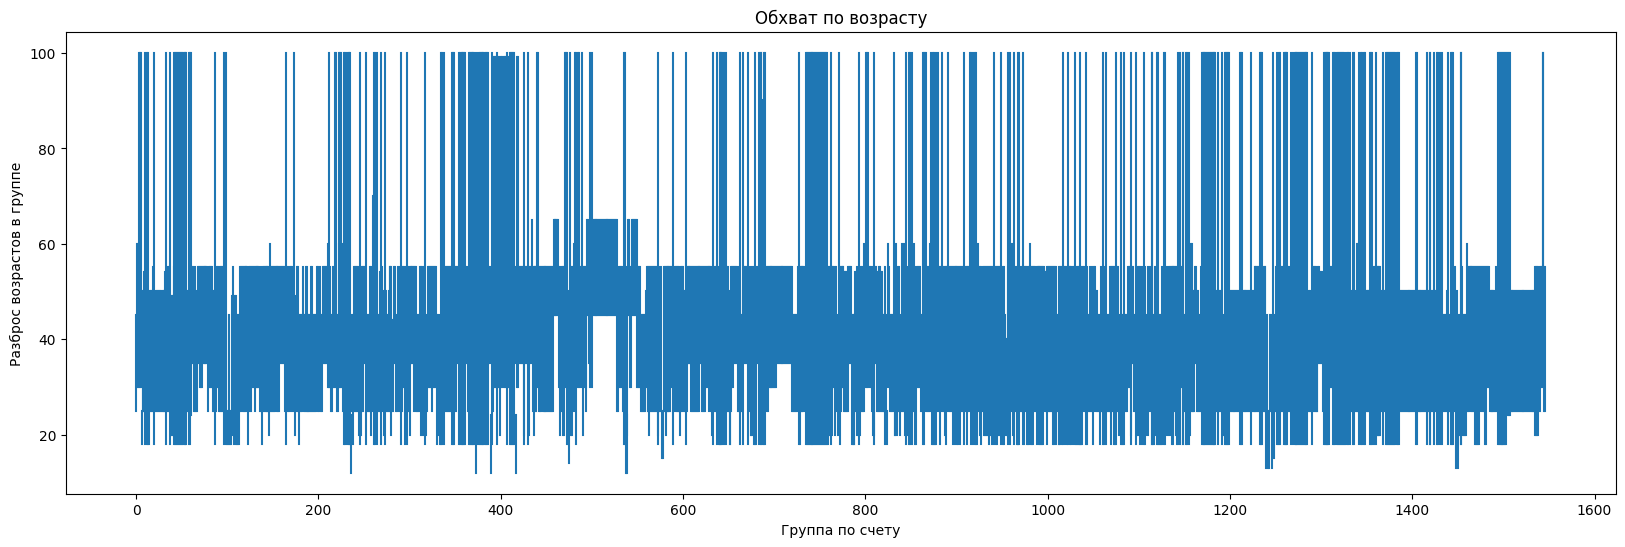

In [ ]:
plt.figure(figsize=(20, 6))
for y in range(len(df)):
  x=[df['ageFrom'].iloc[y], df['ageTo'].iloc[y]]
  plt.plot([y]*2,x, color=(31/255, 119/255, 180/255))

plt.title('Обхват по возрасту')
plt.xlabel('Группа по счету')
plt.ylabel('Разброс возрастов в группе')
plt.show()

In [ ]:
df

,hash,points,value,name,gender,ageFrom,ageTo,income
0,41567f28db47bee7,"[{'lat': '55.573691', 'lon': '37.631423', 'azi...",23.51,All 25-45 BC,all,25,45,bc
1,94b6df335598a161,"[{'lat': '55.656665886902', 'lon': '37.7408534...",1.20,W 30-60,female,30,60,abc
2,2ef4e73f0d2c51d0,"[{'lat': '55.680953807163', 'lon': '37.6644265...",4.65,W 30-60,female,30,60,abc
3,b3ebb77f965de304,"[{'lat': '55.741072317672', 'lon': '37.6526972...",32.09,W 30+ BC,female,30,100,bc
4,76059b6cbb303166,"[{'lat': '55.656665886902', 'lon': '37.7408534...",26.12,W 30+ BC,female,30,100,bc
...,...,...,...,...,...,...,...,...
1542,75563c4cce5ca6c0,"[{'lat': '55.961879', 'lon': '37.333988', 'azi...",20.55,All 30-55 BC,all,30,55,bc
1543,ed4353d7c33dd21c,"[{'lat': '55.752846850282', 'lon': '37.5875834...",59.32,35-100 C,all,35,100,c
1544,77a82843b71a77ec,"[{'lat': '55.752846850282', 'lon': '37.5875834...",41.30,35-100 C,all,35,100,c
1545,87b45be3fae91c39,"[{'lat': '55.662899746091', 'lon': '37.4817413...",59.15,M 25-55,male,25,55,abc


##Разброс в точках разных групп

In [ ]:
def plot_points(df, images_per_row = 5,  centering = False):

    num_rows = len(df) // images_per_row + int(len(df) % images_per_row != 0)
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 3 * num_rows))


    for i in range(num_rows * images_per_row):
        if i < len(df):
            ax = axes.flat[i]

            g = df.iloc[i]
            points = np.array([[float(x['lat']), float(x['lon'])] for x in g['points']])
            ax.scatter(points[:, 0], points[:, 1])
            ax.axis('on')

            ax.set_title(f"{g['name']} | {g['gender']} | {g['value']} | {np.round(g['value']/len(points),2)}")

            if centering:
              #большинство точек находится в этом диапазоне
              ax.set_ylim(37.3, 37.9)
              ax.set_xlim(55.55, 55.95)
        else:
            axes.flat[i].axis('off')


    plt.tight_layout()
    plt.show()

Визуализируем географическое расположение точек

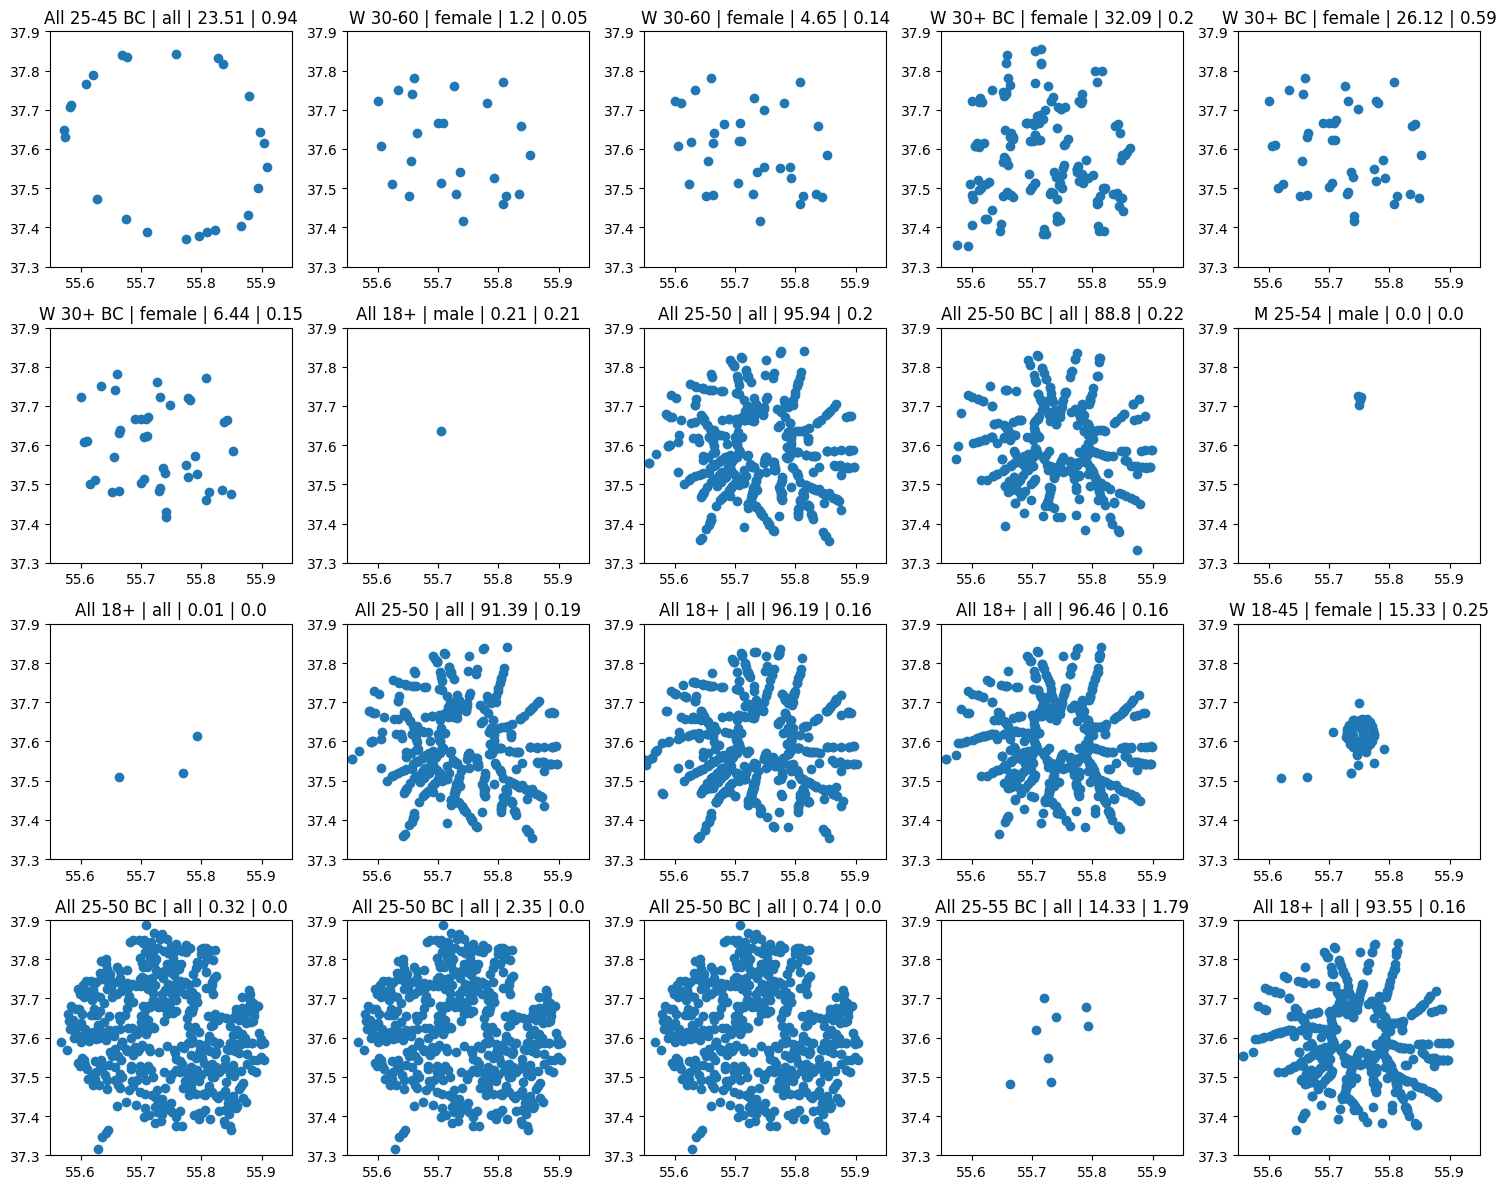

In [ ]:
# Группа | пол | охват | охват каждой точки в среднем
plot_points(df.iloc[:20], centering = True)

#ML

## Создание датасета

Разделим поле точек на регионы и будем считать сколько точек вошло в каждый регион



![](https://sun9-54.userapi.com/impg/QBVBqxSazAvK14qcnHvlbIBYY5LyWgDuyz-jKw/-jZvbdc65xU.jpg?size=1559x671&quality=96&sign=ea433b49256854e166845059f3048790&type=album)

In [ ]:
#Делит отрезок на равные интервалы
def split_on_intervals(min_val, max_val, n):
  step = (max_val - min_val)/n
  intervals = [min_val+(step*x) for x in range(n+1)]
  return intervals


Дополнительно добавим группы, в которые будут входить точки, не попашие в заданные интервалы x и y

![](https://sun9-50.userapi.com/impg/XGrWApG23xrhfxSrEpJ3FUoiEgLvCRqCeMkq_A/Z69rNRJYVbE.jpg?size=1919x1079&quality=96&sign=ff220aa2d2c72a69d0faaedc5bc3e8c6&type=album)

In [ ]:
#Создает регионы для поля
def create_groups(x_intervals, y_intervals):
  groups = {}
  x_intervals = np.concatenate([[-np.inf], x_intervals, [np.inf]])
  y_intervals = np.concatenate([[-np.inf], y_intervals, [np.inf]])

  for x_i in range(len(x_intervals)-1):
    for y_i in range(len(y_intervals)-1):
      groups[f'x : {x_intervals[x_i]} - {x_intervals[x_i+1]} | y : {y_intervals[y_i]} - {y_intervals[y_i+1]}'] = 0

  return groups

In [ ]:
#Сортирует точки по регионам
def sort_on_groups(x_vals, y_vals, x_intervals, y_intervals, groups, only_vals = False):

  for x, y in zip(x_vals, y_vals):
    for x_i in range(len(x_intervals)-1):
      for y_i in range(len(y_intervals)-1):
        if ((x_intervals[x_i] <= x < x_intervals[x_i+1]) and (y_intervals[y_i] <= y < y_intervals[y_i+1])):
          groups[f'x : {x_intervals[x_i]} - {x_intervals[x_i+1]} | y : {y_intervals[y_i]} - {y_intervals[y_i+1]}'] += 1


  if only_vals:
    return list(groups.values())

  return groups

In [ ]:
def create_dataset(config, df):
  x_intervals = split_on_intervals(config['min_xval'], config['max_xval'], config['x_ngroups'])
  y_intervals = split_on_intervals(config['min_yval'], config['max_yval'], config['y_ngroups'])

  groups = create_groups(x_intervals, y_intervals)

  groups_values=[]

  for i in range(len(df)):
    g = df.iloc[i]
    points = np.array([[float(x['lat']), float(x['lon'])] for x in g['points']])


    group_values = sort_on_groups(points[:,0], points[:,1], x_intervals, y_intervals, groups.copy(), only_vals = True)
    groups_values.append(group_values)


  groups_values = np.array(groups_values)

  for i in range(len(groups.keys())):
    groups[list(groups.keys())[i]]=groups_values[:,i]


  return groups


In [ ]:
config = {'min_xval':55.55, 'max_xval':55.95, 'min_yval':37.3, 'max_yval':37.9, 'x_ngroups': 3, 'y_ngroups': 3}

In [ ]:
dataset = pd.DataFrame(create_dataset(config, df))

все получившиеся группы

In [ ]:
dataset.columns

Index(['x : -inf - 55.55 | y : -inf - 37.3',
       'x : -inf - 55.55 | y : 37.3 - 37.5',
       'x : -inf - 55.55 | y : 37.5 - 37.699999999999996',
       'x : -inf - 55.55 | y : 37.699999999999996 - 37.9',
       'x : -inf - 55.55 | y : 37.9 - inf',
       'x : 55.55 - 55.68333333333333 | y : -inf - 37.3',
       'x : 55.55 - 55.68333333333333 | y : 37.3 - 37.5',
       'x : 55.55 - 55.68333333333333 | y : 37.5 - 37.699999999999996',
       'x : 55.55 - 55.68333333333333 | y : 37.699999999999996 - 37.9',
       'x : 55.55 - 55.68333333333333 | y : 37.9 - inf',
       'x : 55.68333333333333 - 55.81666666666667 | y : -inf - 37.3',
       'x : 55.68333333333333 - 55.81666666666667 | y : 37.3 - 37.5',
       'x : 55.68333333333333 - 55.81666666666667 | y : 37.5 - 37.699999999999996',
       'x : 55.68333333333333 - 55.81666666666667 | y : 37.699999999999996 - 37.9',
       'x : 55.68333333333333 - 55.81666666666667 | y : 37.9 - inf',
       'x : 55.81666666666667 - 55.95 | y : -inf - 37.

Изначальные поля точек, перестроенные под количество вхождений в группу

In [ ]:
dataset.head()

,x : -inf - 55.55 | y : -inf - 37.3,x : -inf - 55.55 | y : 37.3 - 37.5,x : -inf - 55.55 | y : 37.5 - 37.699999999999996,x : -inf - 55.55 | y : 37.699999999999996 - 37.9,x : -inf - 55.55 | y : 37.9 - inf,x : 55.55 - 55.68333333333333 | y : -inf - 37.3,x : 55.55 - 55.68333333333333 | y : 37.3 - 37.5,x : 55.55 - 55.68333333333333 | y : 37.5 - 37.699999999999996,x : 55.55 - 55.68333333333333 | y : 37.699999999999996 - 37.9,x : 55.55 - 55.68333333333333 | y : 37.9 - inf,...,x : 55.81666666666667 - 55.95 | y : -inf - 37.3,x : 55.81666666666667 - 55.95 | y : 37.3 - 37.5,x : 55.81666666666667 - 55.95 | y : 37.5 - 37.699999999999996,x : 55.81666666666667 - 55.95 | y : 37.699999999999996 - 37.9,x : 55.81666666666667 - 55.95 | y : 37.9 - inf,x : 55.95 - inf | y : -inf - 37.3,x : 55.95 - inf | y : 37.3 - 37.5,x : 55.95 - inf | y : 37.5 - 37.699999999999996,x : 55.95 - inf | y : 37.699999999999996 - 37.9,x : 55.95 - inf | y : 37.9 - inf
0,0,0,0,0,0,0,2,2,6,0,...,0,4,3,3,0,0,0,0,0,0
1,0,0,0,0,0,0,1,4,4,0,...,0,1,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,2,7,4,0,...,0,2,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,16,22,13,0,...,0,10,10,0,0,0,0,0,0,0
4,0,0,0,0,0,0,2,7,4,0,...,0,2,3,0,0,0,0,0,0,0


Визуализируем полученные поля с группами

In [ ]:
def plot_fields(df, field_size, images_per_row = 5):

    num_rows = len(df) // images_per_row + int(len(df) % images_per_row != 0)
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 3 * num_rows))


    for i in range(num_rows * images_per_row):
        if i < len(df):
            ax = axes.flat[i]

            data = df.iloc[i].values.reshape(field_size)


            ax.imshow(data, cmap="Blues", interpolation='nearest')
            ax.axis('off')


            for i in range(field_size[0]):
              for j in range(field_size[1]):
                  text = ax.text(j, i, f'{data[i, j]}', ha='center', va='center', color='white')
                  text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'), path_effects.Normal()])


        else:
            axes.flat[i].axis('off')


    plt.tight_layout()
    plt.show()

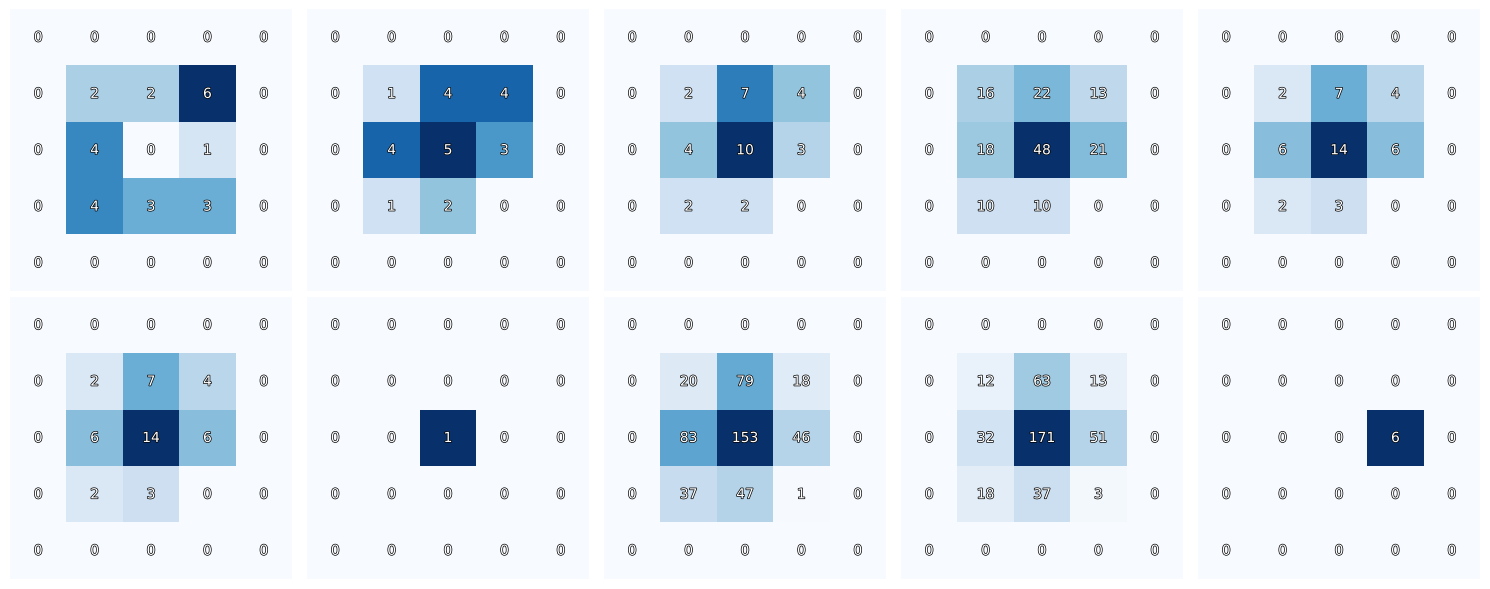

In [ ]:
field_size = (config['x_ngroups']+2,config['y_ngroups']+2) # +2 т.к добавляются группы с + и - бесконечностями
plot_fields(dataset[:10], field_size, images_per_row = 5)

## Создание модели

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

In [ ]:
X = dataset
y = df['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = CatBoostRegressor(iterations=1000,
                          depth=6,
                          learning_rate=0.05,
                          loss_function='RMSE')

model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)

0:	learn: 23.5570296	test: 21.6750802	best: 21.6750802 (0)	total: 48ms	remaining: 47.9s
100:	learn: 11.4750354	test: 11.4338414	best: 11.4338414 (100)	total: 136ms	remaining: 1.21s
200:	learn: 9.1706774	test: 10.1946650	best: 10.1946650 (200)	total: 241ms	remaining: 958ms
300:	learn: 7.9377627	test: 9.5178333	best: 9.5174184 (299)	total: 334ms	remaining: 776ms
400:	learn: 7.1044550	test: 9.1007045	best: 9.1007045 (400)	total: 423ms	remaining: 631ms
500:	learn: 6.5068127	test: 8.8426256	best: 8.8422322 (498)	total: 517ms	remaining: 515ms
600:	learn: 6.0701606	test: 8.6894279	best: 8.6879826 (598)	total: 609ms	remaining: 404ms
700:	learn: 5.7458090	test: 8.6095180	best: 8.6095180 (700)	total: 726ms	remaining: 310ms
800:	learn: 5.4828172	test: 8.5668154	best: 8.5646444 (783)	total: 809ms	remaining: 201ms
900:	learn: 5.2742573	test: 8.5246393	best: 8.5246393 (900)	total: 900ms	remaining: 98.9ms
999:	learn: 5.1108922	test: 8.5197608	best: 8.5188275 (998)	total: 991ms	remaining: 0us

bestTes

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')

RMSE: 8.5188
R²: 0.8518
MAE: 5.6649


#Тестирование

In [ ]:
def show_predictions(y_test,y_pred):
  for yt, yp in zip(y_test,y_pred):
    print(f'{yt} | {yp}')

In [ ]:
slice_idx=10

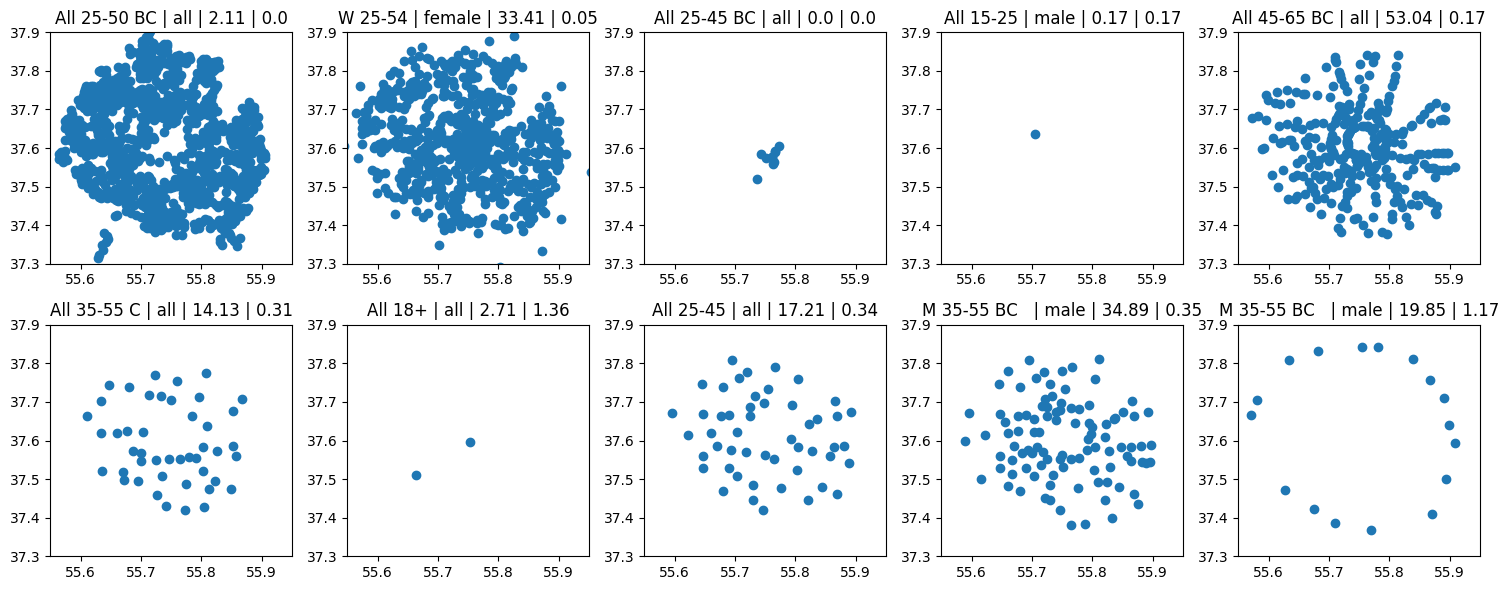

In [ ]:
plot_points(df.iloc[y_test.index[:slice_idx]], centering = True)

In [ ]:
y_pred = np.round(y_pred, 2)
show_predictions(y_test[:slice_idx],y_pred[:slice_idx])

2.11 | 1.58
33.41 | 15.72
0.0 | 6.21
0.17 | 1.45
53.04 | 58.78
14.13 | 18.25
2.71 | 0.84
17.21 | 7.48
34.89 | 26.81
19.85 | 12.42
